# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Prerequisites

Before starting this project, you should have some basic knowledge of Python programming and Pandas. In addition, you may want to use the following packages in your Python environment:

- pandas
- numpy
- seaborn
- matplotlib

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DayLocator, DateFormatter

In [2]:
df  = pd.read_excel('Online Retail.xlsx')
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
# Removing null values
df = df.dropna()

In [4]:
# Removing unnecessary columns
df = df.drop(['InvoiceNo','StockCode'], axis = 1)


                             Description  Quantity         InvoiceDate  \
9          ASSORTED COLOUR BIRD ORNAMENT        32 2010-12-01 08:34:00   
31           INFLATABLE POLITICAL GLOBE         48 2010-12-01 08:45:00   
44               MINI PAINT SET VINTAGE         36 2010-12-01 08:45:00   
46       PAPER CHAIN KIT 50'S CHRISTMAS         80 2010-12-01 09:00:00   
65            VICTORIAN SEWING BOX LARGE        32 2010-12-01 09:09:00   
...                                  ...       ...                 ...   
541835            JUMBO BAG PAISLEY PARK        40 2011-12-09 12:19:00   
541865           LUNCH BAG RED RETROSPOT        40 2011-12-09 12:23:00   
541866   6 CHOCOLATE LOVE HEART T-LIGHTS        36 2011-12-09 12:23:00   
541867  RED FLOCK LOVE HEART PHOTO FRAME        72 2011-12-09 12:25:00   
541868   6 CHOCOLATE LOVE HEART T-LIGHTS        48 2011-12-09 12:25:00   

        UnitPrice  CustomerID         Country  
9            1.69     13047.0  United Kingdom  
31           0.

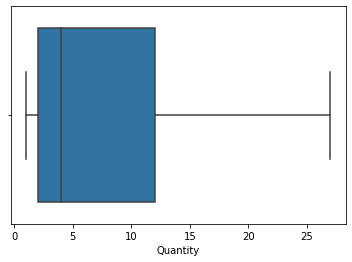

In [5]:
# Detecting outliers in quantity

# Visualizing the outliers before removing them
#sns.boxplot(df['Quantity'])

# Determining IQR
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1

# Defining lower and upper bounds for outlier identification
lower_bound = 0 # Having a quantity less than zero does not have physical meaning hence I made it zero
upper_bound = Q3 + 1.5*IQR

# Outlier identification
outliers = df[(df['Quantity'] < lower_bound) | (df['Quantity'] > upper_bound)]
print(outliers)

# Removing outliers
df= df[(df['Quantity'] >= lower_bound) & (df['Quantity'] <= upper_bound)]

# Box plot after outlier removal
sns.boxplot(df['Quantity'])



                           Description  Quantity         InvoiceDate  \
5         SET 7 BABUSHKA NESTING BOXES         2 2010-12-01 08:26:00   
16      BOX OF VINTAGE ALPHABET BLOCKS         2 2010-12-01 08:34:00   
19         RECIPE BOX WITH METAL HEART         4 2010-12-01 08:34:00   
20                 DOORMAT NEW ENGLAND         4 2010-12-01 08:34:00   
45                             POSTAGE         3 2010-12-01 08:45:00   
...                                ...       ...                 ...   
541768                         POSTAGE         3 2011-12-09 12:16:00   
541786  BOX OF VINTAGE ALPHABET BLOCKS         6 2011-12-09 12:16:00   
541831    CHRISTMAS LIGHTS 10 REINDEER         4 2011-12-09 12:19:00   
541849   TABLECLOTH RED APPLES DESIGN          2 2011-12-09 12:20:00   
541892   RED RETROSPOT ROUND CAKE TINS        24 2011-12-09 12:49:00   

        UnitPrice  CustomerID         Country  
5            7.65     17850.0  United Kingdom  
16           9.95     13047.0  United K

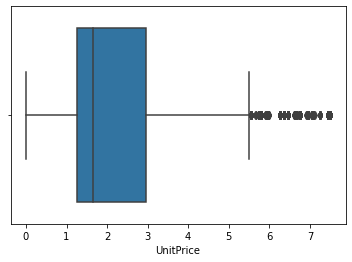

In [6]:
# Detecting outliers in unit price

# Box plot before outlier removal
#sns.boxplot(df['UnitPrice'])

# Determining IQR
Q1 = df['UnitPrice'].quantile(0.25)
Q3 = df['UnitPrice'].quantile(0.75)
IQR =  Q3 - Q1

# Defining bounds
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# Outlier identification
outliers = df[(df['UnitPrice'] < lower_bound)|(df['UnitPrice'] > upper_bound)]
print(outliers)

# Removing outliers
df = df[(df['UnitPrice'] >= lower_bound)&(df['UnitPrice'] <= upper_bound)]

# Box plot after outlier removal
sns.boxplot(df['UnitPrice'])

In [11]:
# Create a new column 'TotalPrice'
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
# Determine the top 5 most valued customers based on total spend
customer_total_spend = df.groupby('CustomerID')['TotalPrice'].sum()
top_5_customers = customer_total_spend.nlargest(5)
print("Top 5 most valued customers:")
print(top_5_customers)


# Determine top selling products
top_selling = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(5)
top_selling_description = top_selling.index.unique()
print("Top selling products:")
print(top_selling_description)




Top 5 most valued customers:
CustomerID
14911.0    85018.78
13089.0    36411.63
14096.0    36019.84
17841.0    32644.72
14298.0    24387.53
Name: TotalPrice, dtype: float64
Top selling products:
Index(['PACK OF 72 RETROSPOT CAKE CASES', 'ASSORTED COLOUR BIRD ORNAMENT',
       'JUMBO BAG RED RETROSPOT', 'WHITE HANGING HEART T-LIGHT HOLDER',
       'LUNCH BAG RED RETROSPOT'],
      dtype='object', name='Description')


In [12]:
# Measures of dispersion
df.describe()
# The std of the total price would be useful to see the spread from the mean

,Quantity,UnitPrice,CustomerID,TotalPrice
count,338182.000000,338182.000000,338182.000000,338182.000000
mean,7.476811,2.191816,15325.874973,12.770823
std,6.770883,1.544842,1710.766218,13.176967
min,1.000000,0.000000,12347.000000,0.000000
25%,2.000000,1.250000,13994.000000,3.800000
50%,6.000000,1.650000,15245.000000,10.080000
75%,12.000000,2.950000,16818.000000,17.400000
max,27.000000,7.500000,18287.000000,178.800000


Year  Month
2010  12       286014.610
2011  1        233908.010
      2        220099.410
      3        286501.840
      4        242996.611
      5        325996.840
      6        291135.140
      7        289833.551
      8        306043.760
      9        482556.772
      10       527605.080
      11       647874.300
      12       178296.600
Name: TotalPrice, dtype: float64


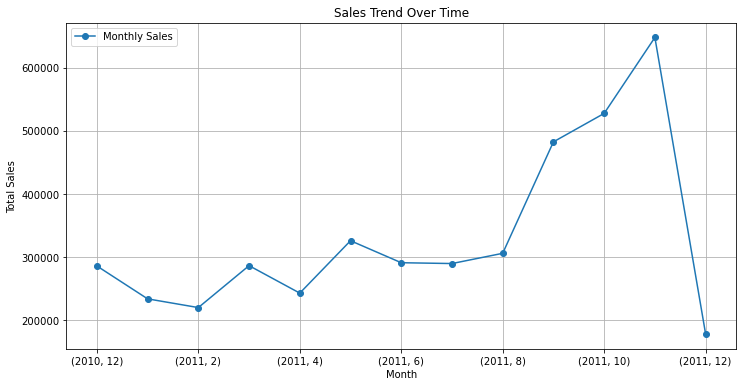

In [13]:
# Sales over time, starting with sales over months


# Extract year and month from 'InvoiceDate'
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month

# Group by year and month, sum total sales for each month
monthly_sales = df.groupby(['Year', 'Month'])['TotalPrice'].sum()
print(monthly_sales)

# Filter data for the first 12 months
#first_12_months = monthly_sales.head(12)

# Plotting the sales trend over the first 12 months
plt.figure(figsize=(12, 6))

# Plot the line chart
monthly_sales.plot(kind='line', marker='o', label='Monthly Sales')


# Set plot labels and title
plt.title('Sales Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')

# Show legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


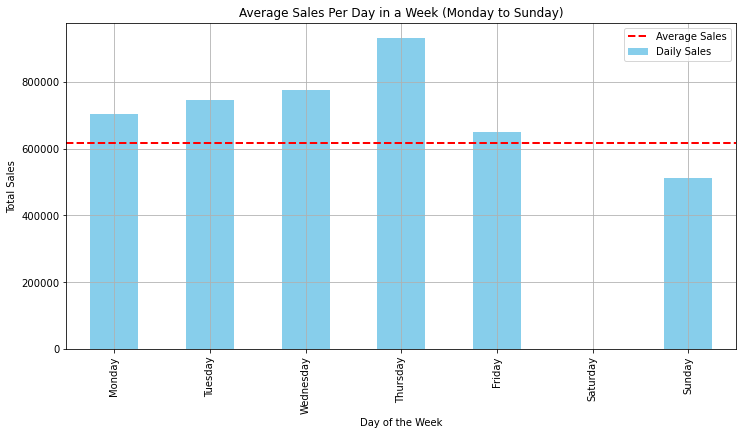

In [14]:


# Extract day of the week from 'InvoiceDate'
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()

# Reorder days of the week starting from Monday
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['DayOfWeek'] = pd.Categorical(df['DayOfWeek'], categories=days_order, ordered=True)

# Group by day of the week, sum total sales for each day
daily_sales = df.groupby('DayOfWeek')['TotalPrice'].sum()

# Calculate the average daily sales for the entire time period
average_daily_sales = daily_sales.mean()

# Plotting the average sales per day in a week
plt.figure(figsize=(12, 6))

# Plot the bar chart
daily_sales.plot(kind='bar', label='Daily Sales', color='skyblue')

# Plot the average line
plt.axhline(average_daily_sales, color='red', linestyle='dashed', linewidth=2, label='Average Sales')

# Set plot labels and title
plt.title('Average Sales Per Day in a Week (Monday to Sunday)')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')

# Show legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


# Conclusion
As part of the data cleaning process, rows consisting of any null values were removed as well unnecessary columns such as invoice number and stockcode. There were outliers in the quantity and unit price, these were removed as outliers distort statistical analyses. As part of the main analysis, five most valued customers were determined as well as five top selling products which were found to be a pack of 72 Retrospot cake cases, assorted colour bird ornament, jumbo bag red retrospot, white hanging heart T-light holder and a jumbo lunch bag red retrospot. More insights uncovered include the busiest months which were found to be September, October and November. Additionally, the busiest day was determined to be Thursday. According to the analysis, the total sales on Saturday were zero which may indicate that the store is usually closed on Saturdays.